In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import array
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.utils import resample

In [61]:
df_july = pd.read_csv("Data_july.csv",encoding='cp1252')
df_june = pd.read_csv("Data_june.csv",encoding='cp1252') 
df_may = pd.read_csv("Data_may.csv",encoding='cp1252')
df_apr = pd.read_csv("Data_april.csv",encoding='cp1252')
df_march = pd.read_csv("Data_march.csv",encoding='cp1252')
df_feb = pd.read_csv("Data_feb.csv",encoding='cp1252')
df_jan = pd.read_csv("Data_jan.csv",encoding='cp1252')
df_results = pd.read_csv("lab_results.csv",encoding='cp1252')

In [62]:
def get_required_data(x):
    y = x.copy()
    y.drop(['APS FEED','11FC101.PV','Unnamed: 2','Unnamed: 19'], axis=1,inplace = True)
    y.drop(y.index[[0,1,2,3,4,5,6]], inplace=True)
    y.columns = df_july.columns
#     y = y.iloc[:-1,:]
    return y

In [63]:
df_june = get_required_data(df_june)
df_june = df_june.iloc[:-1]
df_may = get_required_data(df_may)
df_may = df_may.iloc[:-1]
df_april = get_required_data(df_apr)
df_april = df_april.iloc[:-1]
df_mar = get_required_data(df_march)
df_mar = df_mar.iloc[:-1]
df_feb = get_required_data(df_feb)
df_feb = df_feb.iloc[:-1]
df_jan = get_required_data(df_jan)
df_jan = df_jan.iloc[:-1]

In [64]:
df_june

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –
7,01-06-2023,800.57,92.12,1.35,159.25,29.79,5.72,180.24,123.83,1643.98,110.89,32.02,2.8,215.24,192.61,167.84,25.45784195
8,01-06-2023 00:10,799.29,92,1.35,159.51,29.8,5.72,181.33,124.21,1643.87,112.38,31.99,2.91,215.45,193,167.88,25.83010326
9,01-06-2023 00:20,799.17,92.24,1.36,159.34,29.79,5.71,180.91,123.89,1649.99,110.78,32.02,2.8,215.17,192.61,168.01,25.2848222
10,01-06-2023 00:30,799.86,92.03,1.34,159.25,29.8,5.74,179.46,124.05,1647.29,113.49,31.96,2.74,215.18,192.72,167.8,25.58869934
11,01-06-2023 00:40,798.87,92.09,1.33,159.19,29.8,5.71,179.84,123.91,1646.13,112.23,31.73,2.84,214.93,192.43,167.75,25.37388642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,30-06-2023 23:10,873.93,105.82,1.65,161.92,34.99,5.74,169.01,122.9,1960.49,130.08,56.03,2.11,216.28,193.38,168.69,25.14661501
4323,30-06-2023 23:20,875.48,105.76,1.65,162.5,34.98,5.8,170.49,122.84,1948.31,126.73,55.9,2.8,216.33,193.77,169.05,25.31727685
4324,30-06-2023 23:30,874.52,105.99,1.65,162.66,34.98,5.82,171.22,123.23,1962.7,128.23,56.09,3.21,216.63,193.96,169.4,25.24658081
4325,30-06-2023 23:40,874.77,106.11,1.65,162.87,34.97,5.82,173.38,123.41,1957.66,125.74,56.13,3.18,217.12,194.24,169.55,25.37568844


In [65]:
concatenated_df = pd.concat([df_jan,df_feb,df_mar,df_april,df_may,df_june,df_july], axis=0)

In [66]:
concatenated_df

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –
7,01-01-2023,812.01,131.87,1.63,163.97,38.35,5.81,182.23,124.03,2121.2,150.62,58.02,38.01,221.13,192.75,177.05,23.88020626
8,01-01-2023 00:10,810.48,131.73,1.64,164.08,38.36,5.67,181.62,123.79,2120.4,147.83,57.97,37.91,220.77,192.38,177.15,23.40023381
9,01-01-2023 00:20,808.1,131.91,1.66,163.42,38.32,5.7,179.97,123.46,2121.38,142.36,58.04,37.96,220.26,191.88,176.67,23.37696839
10,01-01-2023 00:30,809.95,132.01,1.62,163.89,38.33,5.78,177.46,124.14,2121.42,152.42,58.07,38.05,220.58,192.24,176.45,23.95860086
11,01-01-2023 00:40,808.9,131.79,1.64,164.35,38.33,5.61,179.06,123.99,2122.34,150.98,57.99,38.02,220.45,191.98,176.99,23.20328932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,26-07-2023 23:20,874.0,97.59,1.45,161.18,30.78,5.19,148.84,123.35,1765.5,113.19,40.41,3.47,219.43,195.19,172.22,23.8319
3741,26-07-2023 23:30,875.26,97.54,1.45,161.31,30.78,5.27,148.44,123.24,1764.12,113.69,40.43,3.5,219.3,195.16,172.4,23.626209
3742,26-07-2023 23:40,874.41,97.36,1.45,161.4,30.78,5.28,146.88,123.4,1767.06,114.18,40.4,3.81,219.05,195.14,172.42,23.655673
3743,26-07-2023 23:50,875.14,97.34,1.45,161.35,30.79,5.2,147.22,123.36,1769.28,114.6,40.36,3.7,218.95,195.13,172.3,23.735424


In [67]:
concatenated_df.shape

(30385, 17)

In [68]:
concatenated_df.reset_index(drop = True,inplace = True)

In [69]:
concatenated_df.isna().sum()

Timestamp                                                                   574
TOTAL CRUDE FLOW                                                            574
TOTAL ATF KERO/DHDS FLOW                                                    574
APS Overhead Pressure                                                       574
FBS D/O TEMP                                                                574
CRUDE API AT 15 DEGC                                                        574
ATF- TOP SECTION PDT                                                        574
11-T-1 REFLUX FLOW                                                          574
 APS O/H TEMP                                                               574
ATF STRIPPING STEAM                                                         574
Nphtha Total flow                                                           574
FBS TOTAL FLOW                                                              574
TPA TO ATF STRIPPER FLOW                

In [70]:
concatenated_df.dropna(inplace = True)
concatenated_df

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –
0,01-01-2023,812.01,131.87,1.63,163.97,38.35,5.81,182.23,124.03,2121.2,150.62,58.02,38.01,221.13,192.75,177.05,23.88020626
1,01-01-2023 00:10,810.48,131.73,1.64,164.08,38.36,5.67,181.62,123.79,2120.4,147.83,57.97,37.91,220.77,192.38,177.15,23.40023381
2,01-01-2023 00:20,808.1,131.91,1.66,163.42,38.32,5.7,179.97,123.46,2121.38,142.36,58.04,37.96,220.26,191.88,176.67,23.37696839
3,01-01-2023 00:30,809.95,132.01,1.62,163.89,38.33,5.78,177.46,124.14,2121.42,152.42,58.07,38.05,220.58,192.24,176.45,23.95860086
4,01-01-2023 00:40,808.9,131.79,1.64,164.35,38.33,5.61,179.06,123.99,2122.34,150.98,57.99,38.02,220.45,191.98,176.99,23.20328932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30380,26-07-2023 23:20,874.0,97.59,1.45,161.18,30.78,5.19,148.84,123.35,1765.5,113.19,40.41,3.47,219.43,195.19,172.22,23.8319
30381,26-07-2023 23:30,875.26,97.54,1.45,161.31,30.78,5.27,148.44,123.24,1764.12,113.69,40.43,3.5,219.3,195.16,172.4,23.626209
30382,26-07-2023 23:40,874.41,97.36,1.45,161.4,30.78,5.28,146.88,123.4,1767.06,114.18,40.4,3.81,219.05,195.14,172.42,23.655673
30383,26-07-2023 23:50,875.14,97.34,1.45,161.35,30.79,5.2,147.22,123.36,1769.28,114.6,40.36,3.7,218.95,195.13,172.3,23.735424


In [71]:
concatenated_df.shape

(29811, 17)

In [72]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29811 entries, 0 to 30384
Data columns (total 17 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Timestamp                                                                 29811 non-null  object
 1   TOTAL CRUDE FLOW                                                          29811 non-null  object
 2   TOTAL ATF KERO/DHDS FLOW                                                  29811 non-null  object
 3   APS Overhead Pressure                                                     29811 non-null  object
 4   FBS D/O TEMP                                                              29811 non-null  object
 5   CRUDE API AT 15 DEGC                                                      29811 non-null  object
 6   ATF- TOP SECTION PDT                                                  

In [73]:
df_results

,Sampled Date,Result Value
0,01-01-2023 07:00,39.0
1,01-01-2023 17:00,41.5
2,02-01-2023 07:00,38.0
3,02-01-2023 17:00,38.5
4,03-01-2023 07:00,39.0
...,...,...
434,24-07-2023 17:00,39.0
435,25-07-2023 07:00,40.0
436,25-07-2023 17:00,39.0
437,26-07-2023 07:00,39.5


In [74]:

new_column_names = {'Sampled Date': 'Timestamp'}
df_results.rename(columns=new_column_names, inplace=True)

In [75]:
df_results

,Timestamp,Result Value
0,01-01-2023 07:00,39.0
1,01-01-2023 17:00,41.5
2,02-01-2023 07:00,38.0
3,02-01-2023 17:00,38.5
4,03-01-2023 07:00,39.0
...,...,...
434,24-07-2023 17:00,39.0
435,25-07-2023 07:00,40.0
436,25-07-2023 17:00,39.0
437,26-07-2023 07:00,39.5


In [76]:
merged_df_right = pd.merge(concatenated_df, df_results, on='Timestamp',how = 'right')
merged_df_right

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,01-01-2023 07:00,812.32,131.95,1.66,164.26,38.3,5.82,188.13,123.7,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.86903448,39.0
1,01-01-2023 17:00,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.5,57.93,37.98,219.87,191.51,175.65,24.0057521,41.5
2,02-01-2023 07:00,807.45,131.99,1.64,163.31,38.34,5.7,179.98,123.19,2207.5,145.54,57.99,38.04,219.35,191.37,175.64,23.79393818,38.0
3,02-01-2023 17:00,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.6,58.54,38.01,222.32,193.59,176.55,25.18398762,38.5
4,03-01-2023 07:00,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38,220.24,190.97,173.85,25.42168682,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,24-07-2023 17:00,873.93,110.22,1.5,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,25-07-2023 07:00,875.07,94.07,1.4,159.79,32.48,5.56,155.03,122.9,1545.17,119.34,43.1,3.39,214.72,191.49,168.74,23.587139,40.0
436,25-07-2023 17:00,875.58,100.27,1.4,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.8,192.37,170.28,22.891583,39.0
437,26-07-2023 07:00,876.73,97.97,1.4,158.44,31.79,5.55,166.03,123.4,1757.03,115.03,34.02,3.14,217.25,191.9,167.37,25.342483,39.5


In [77]:
# merged_df_right.to_clipboard()

In [78]:
merged_df_right.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 0 to 438
Data columns (total 18 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Timestamp                                                                 439 non-null    object 
 1   TOTAL CRUDE FLOW                                                          428 non-null    object 
 2   TOTAL ATF KERO/DHDS FLOW                                                  428 non-null    object 
 3   APS Overhead Pressure                                                     428 non-null    object 
 4   FBS D/O TEMP                                                              428 non-null    object 
 5   CRUDE API AT 15 DEGC                                                      428 non-null    object 
 6   ATF- TOP SECTION PDT                                              

In [79]:
merged_df_right.isna().sum()

Timestamp                                                                    0
TOTAL CRUDE FLOW                                                            11
TOTAL ATF KERO/DHDS FLOW                                                    11
APS Overhead Pressure                                                       11
FBS D/O TEMP                                                                11
CRUDE API AT 15 DEGC                                                        11
ATF- TOP SECTION PDT                                                        11
11-T-1 REFLUX FLOW                                                          11
 APS O/H TEMP                                                               11
ATF STRIPPING STEAM                                                         11
Nphtha Total flow                                                           11
FBS TOTAL FLOW                                                              11
TPA TO ATF STRIPPER FLOW                            

In [80]:
df_droped_date = merged_df_right.drop(columns = "Timestamp")
df_droped_date.shape

(439, 17)

In [81]:
df_droped_date.dtypes

TOTAL CRUDE FLOW                                                             object
TOTAL ATF KERO/DHDS FLOW                                                     object
APS Overhead Pressure                                                        object
FBS D/O TEMP                                                                 object
CRUDE API AT 15 DEGC                                                         object
ATF- TOP SECTION PDT                                                         object
11-T-1 REFLUX FLOW                                                           object
 APS O/H TEMP                                                                object
ATF STRIPPING STEAM                                                          object
Nphtha Total flow                                                            object
FBS TOTAL FLOW                                                               object
TPA TO ATF STRIPPER FLOW                                                    

In [82]:
df_droped_date = df_droped_date.astype(float)
df_droped_date.dtypes

TOTAL CRUDE FLOW                                                            float64
TOTAL ATF KERO/DHDS FLOW                                                    float64
APS Overhead Pressure                                                       float64
FBS D/O TEMP                                                                float64
CRUDE API AT 15 DEGC                                                        float64
ATF- TOP SECTION PDT                                                        float64
11-T-1 REFLUX FLOW                                                          float64
 APS O/H TEMP                                                               float64
ATF STRIPPING STEAM                                                         float64
Nphtha Total flow                                                           float64
FBS TOTAL FLOW                                                              float64
TPA TO ATF STRIPPER FLOW                                                    

In [83]:
#filling null value with mean
for column in df_droped_date.columns:
    mean_value = df_droped_date[column].mean()
    df_droped_date[column].fillna(mean_value, inplace=True)

In [84]:
df_droped_date

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,2207.50,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [85]:
df_droped_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   TOTAL CRUDE FLOW                                                          439 non-null    float64
 1   TOTAL ATF KERO/DHDS FLOW                                                  439 non-null    float64
 2   APS Overhead Pressure                                                     439 non-null    float64
 3   FBS D/O TEMP                                                              439 non-null    float64
 4   CRUDE API AT 15 DEGC                                                      439 non-null    float64
 5   ATF- TOP SECTION PDT                                                      439 non-null    float64
 6   11-T-1 REFLUX FLOW                                                

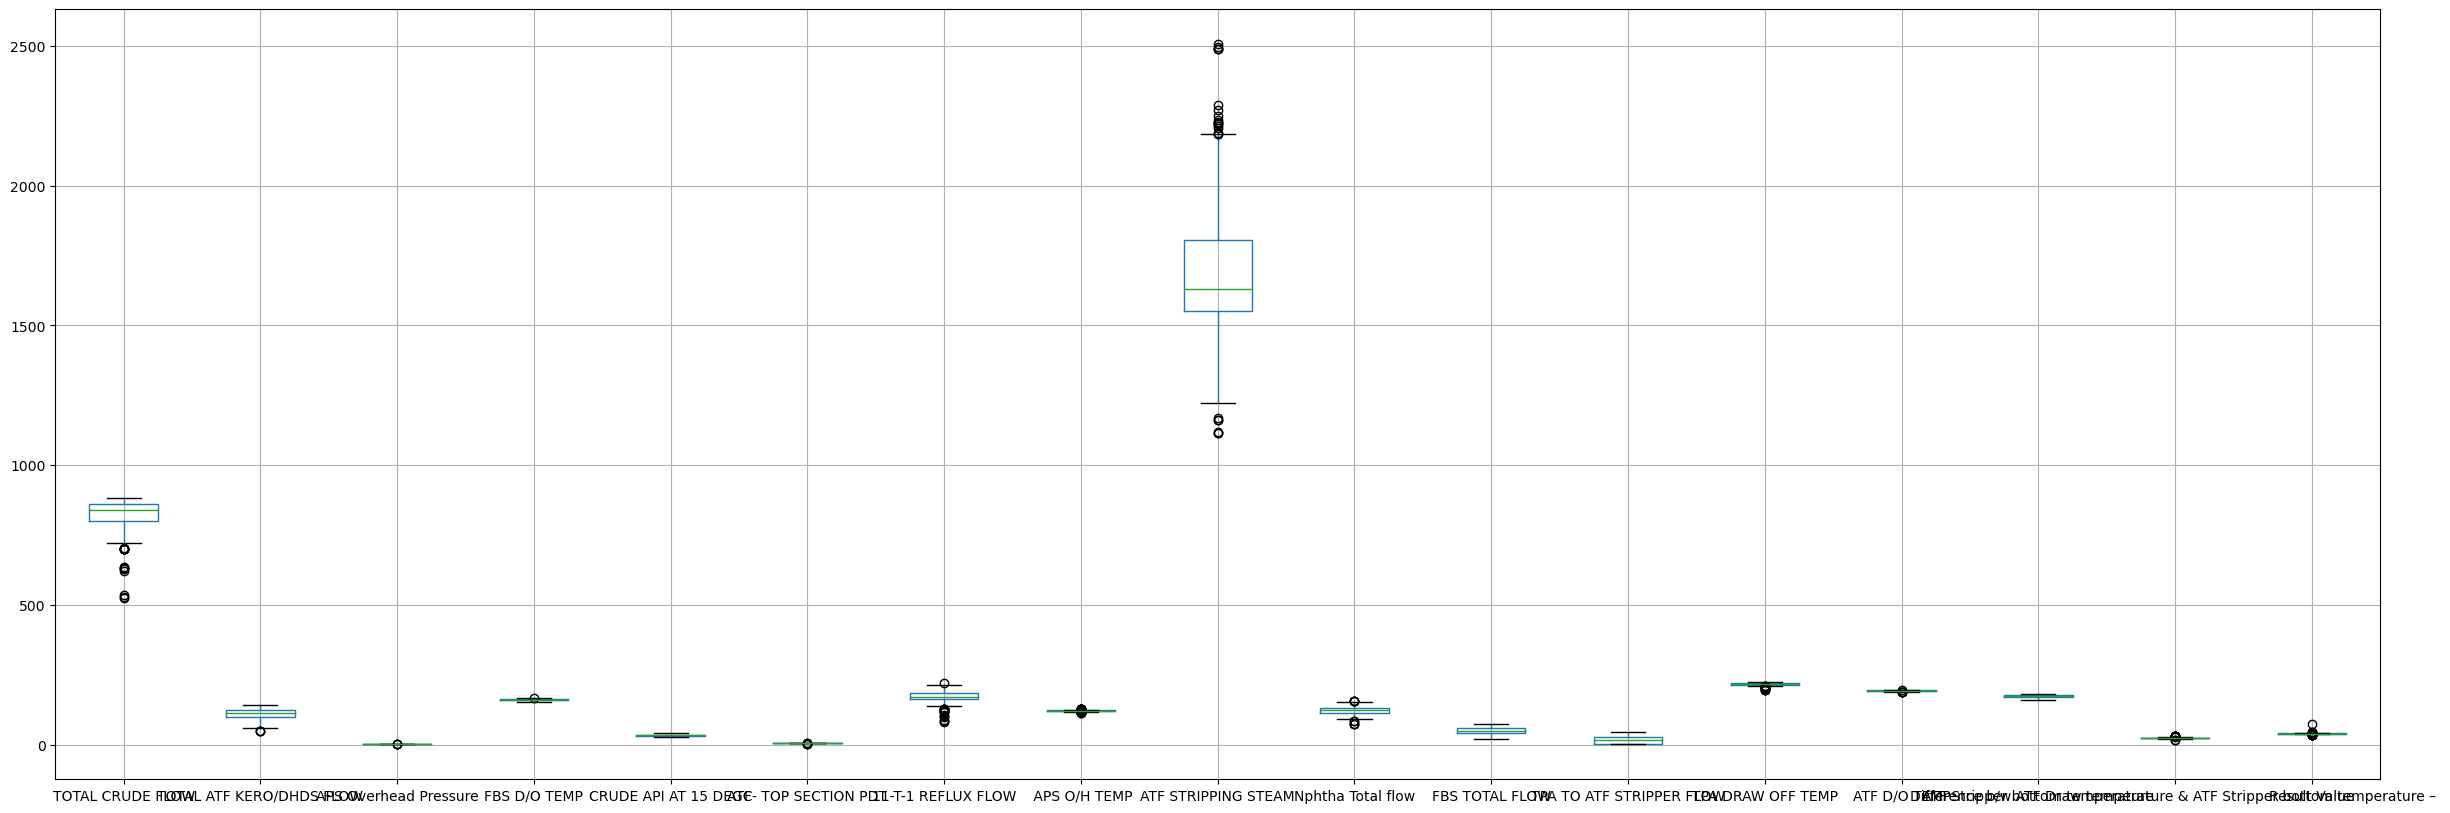

In [86]:
df_droped_date.boxplot(figsize = (30,10))
plt.show()

<Figure size 100000x50000 with 0 Axes>

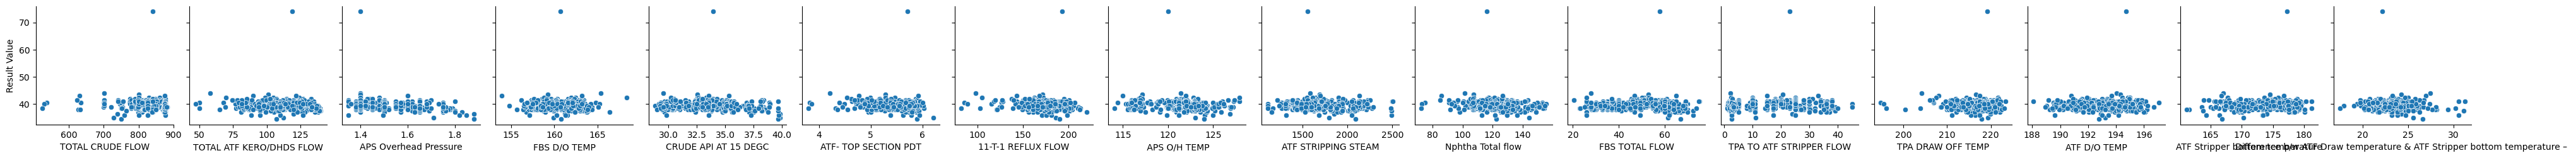

In [87]:
plt.figure(figsize=(1000,500))
sns.pairplot(x_vars = ['TOTAL CRUDE FLOW', 'TOTAL ATF KERO/DHDS FLOW', 'APS Overhead Pressure',
       'FBS D/O TEMP', 'CRUDE API AT 15 DEGC', 'ATF- TOP SECTION PDT',
       '11-T-1 REFLUX FLOW', ' APS O/H TEMP', 'ATF STRIPPING STEAM',
       'Nphtha Total flow', 'FBS TOTAL FLOW', 'TPA TO ATF STRIPPER FLOW',
       'TPA DRAW OFF TEMP', 'ATF D/O TEMP', 'ATF Stripper bottom temperature',
       'Difference b/w ATF Draw temperature & ATF Stripper bottom temperature – '],y_vars=['Result Value'],data=df_droped_date)
plt.show()

In [88]:
#df_droped_date.to_clipboard()

In [89]:
def get_model_evaluation(model, y_test, y_pred):
    mse=mean_squared_error(y_test,y_pred).round(3)
    mae=mean_absolute_error(y_test,y_pred).round(3)
    rmse=np.sqrt(mse).round(3)
    score=model.score(X_test,y_test).round(3)
    print("Mean Squared Error =", mse)
    print("Mean Absolute Error =", mae)
    print("Root Mean Squared Error =", rmse)
    print("R2_Score Value =", score)

In [90]:
def plot_graph(actual,predicted):
    residual = np.array(actual) - np.array(predicted)  
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
    sns.lineplot(x = range(len(predicted)), y = predicted,label='y_pred', ax = ax[0,0])
    sns.lineplot(x = range(len(predicted)),y =actual,label='y_test', ax = ax[0,0])
    ax[0,0].set_title('Y_pred and Y_test comparison graph')
    ax[0,0].legend()
    sns.histplot(residual, ax = ax[0,1])
    ax[0,1].set_title('Residual Histogram Plot')
    sns.scatterplot(x=actual,y=residual, ax=ax[1,0])
    ax[1,0].set_title('Actual vs Residual')
    ax[1,0].set_xlabel('Actual')
    ax[1,0].set_ylabel('Residual')
    sns.scatterplot(x=actual,y=predicted, ax=ax[1,1])
    ax[1,1].set_title('Actual vs Predicted')
    ax[1,1].set_xlabel('Actual')
    ax[1,1].set_ylabel('Predicted')
    plt.show()

In [132]:
X = df_droped_date.drop(columns = "Result Value")
y = df_droped_date["Result Value"]

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)

Mean Squared Error = 1.076
Mean Absolute Error = 0.823
Root Mean Squared Error = 1.037
R2_Score Value = 0.33


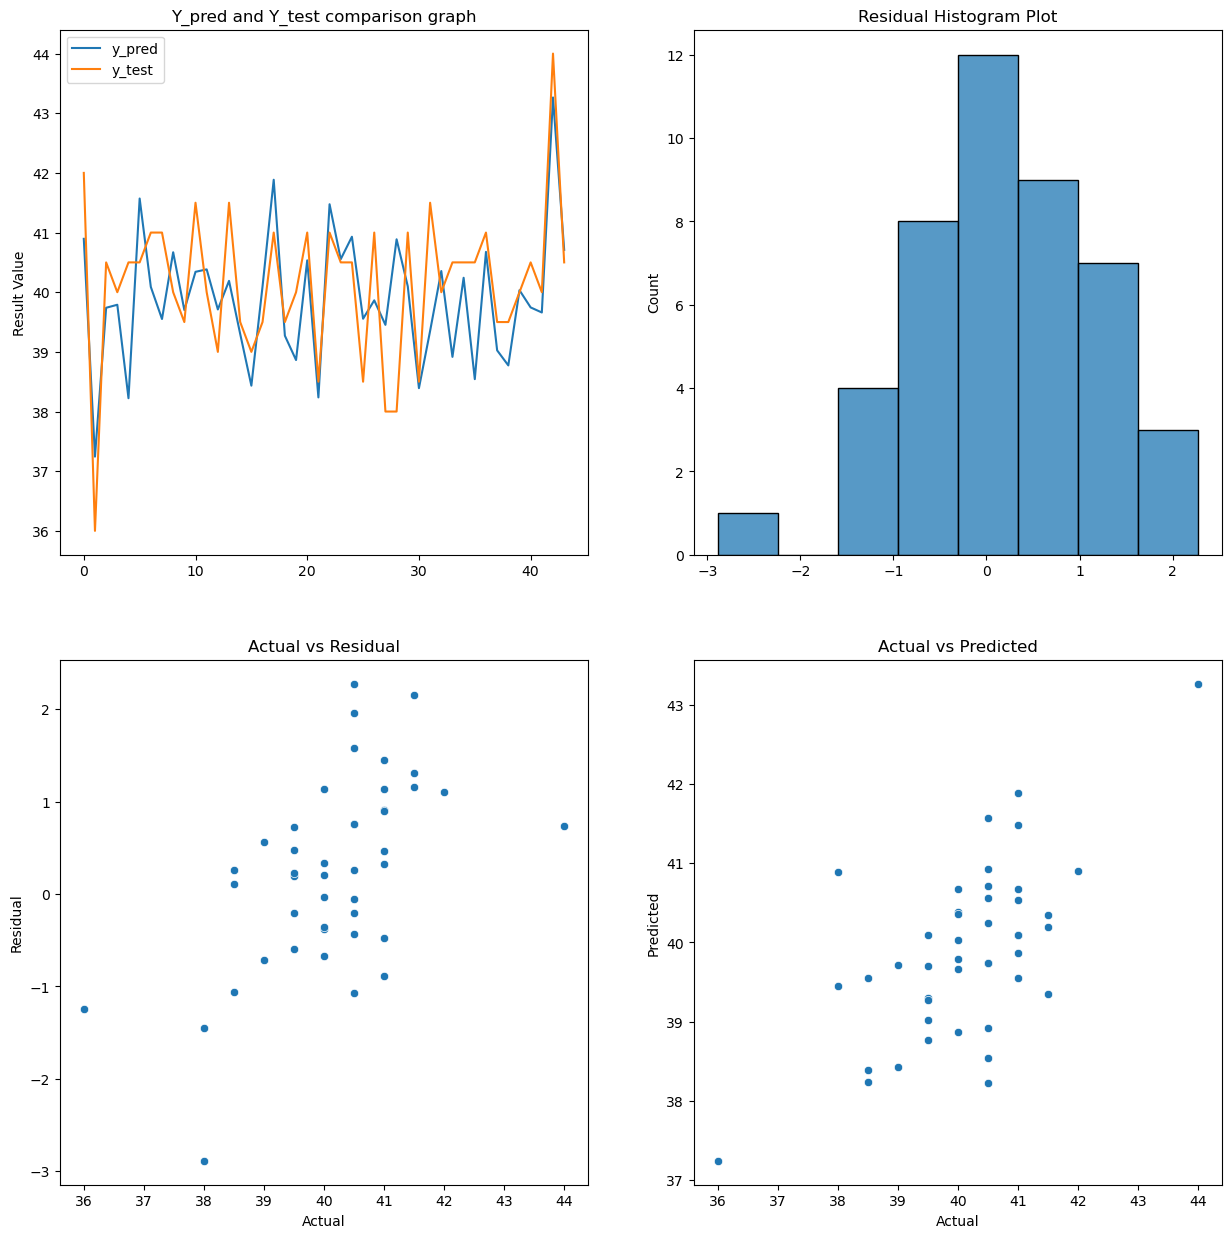

In [142]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
get_model_evaluation(lr, y_test, y_pred)
plot_graph(y_test, y_pred)

Mean Squared Error = 1.5
Mean Absolute Error = 1.001
Root Mean Squared Error = 1.225
R2_Score Value = 0.066


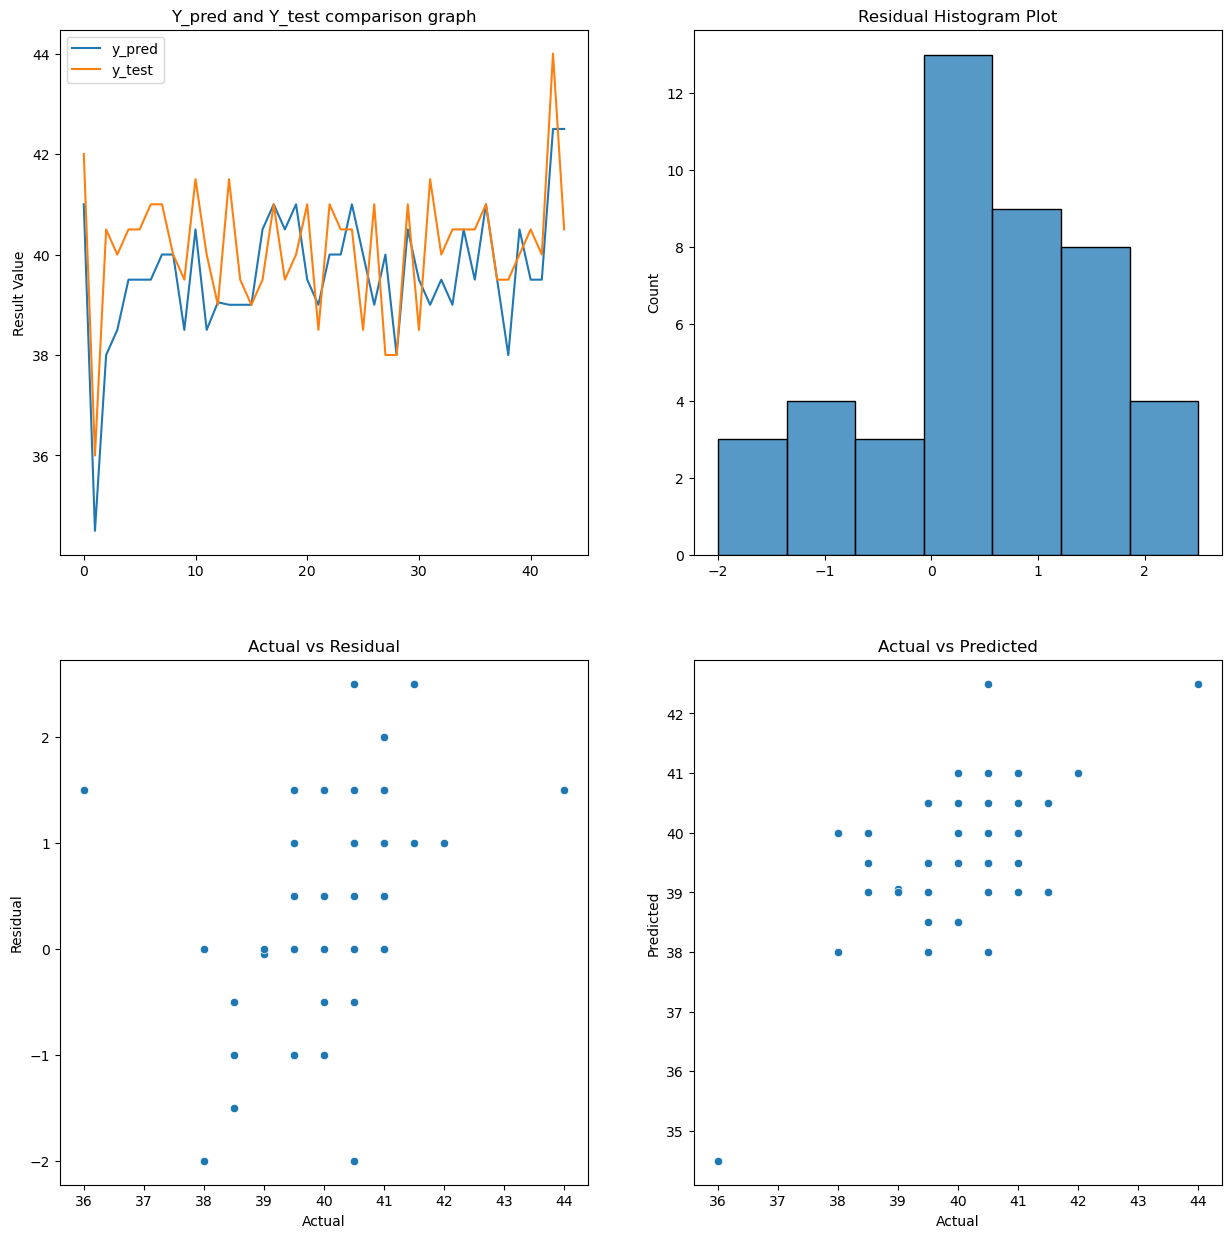

In [143]:
model=DecisionTreeRegressor()
rgr =  model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred
get_model_evaluation(model,y_test, y_pred)
plot_graph(y_test, y_pred)

Mean Squared Error = 1.512
Mean Absolute Error = 0.972
Root Mean Squared Error = 1.23
R2_Score Value = 0.059


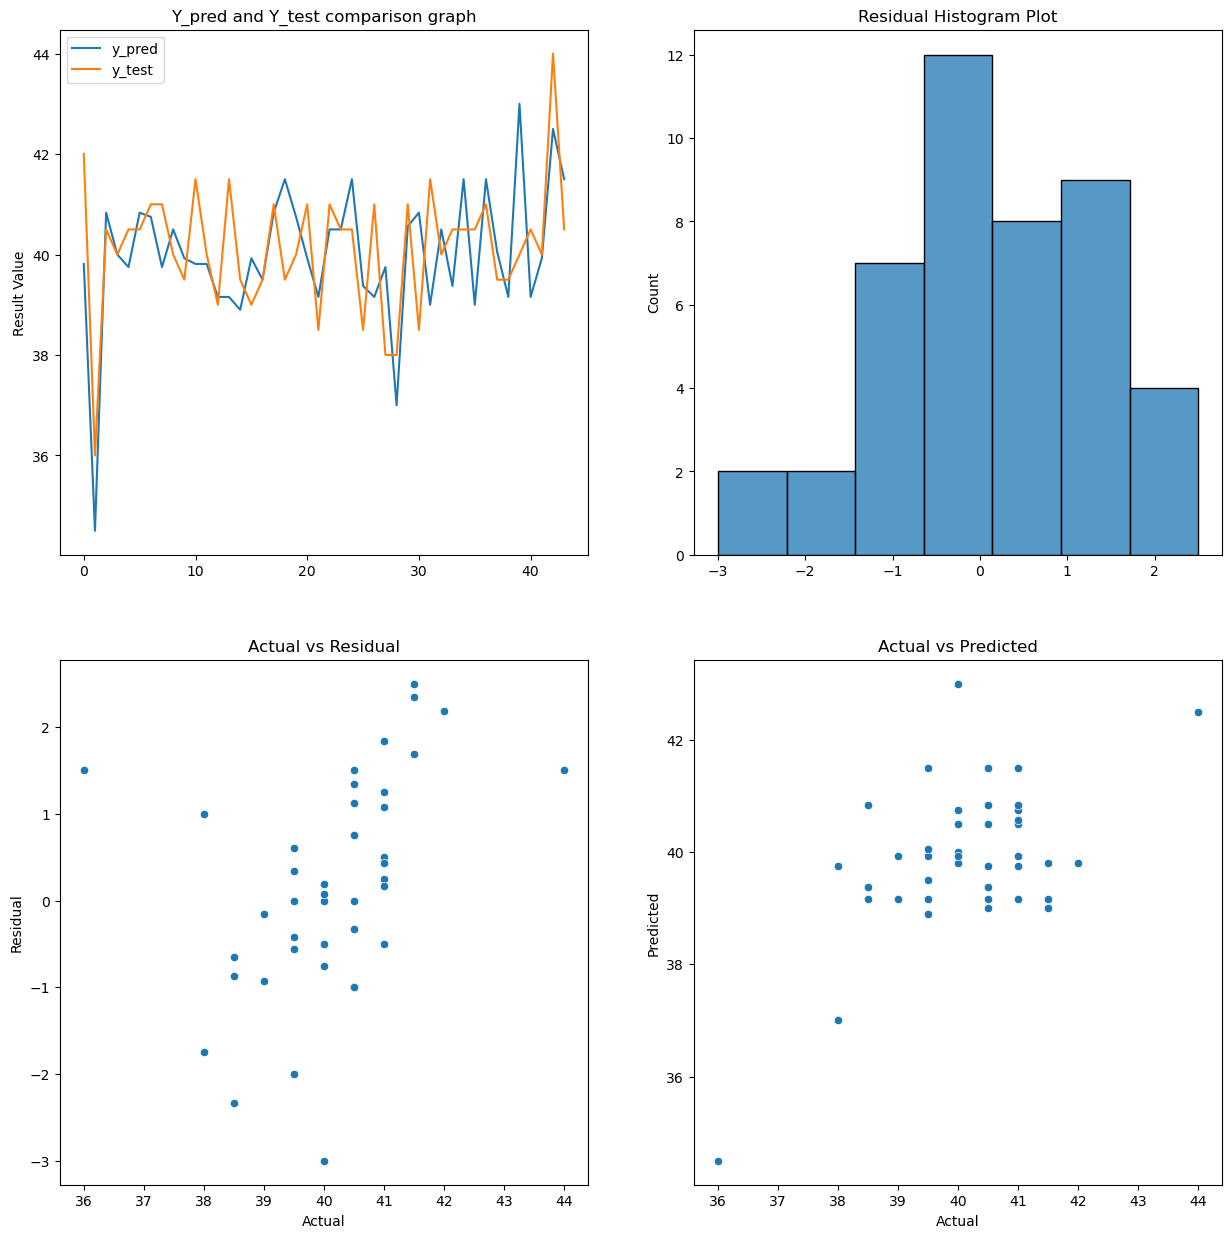

In [144]:
model=DecisionTreeRegressor(max_depth= 10,
 max_features='sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2
)
rgr =  model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred
get_model_evaluation(model,y_test, y_pred)
plot_graph(y_test, y_pred)

In [180]:
regressor = DecisionTreeRegressor()
#Defining Hyperparameters for Grid SEarch
param_grid = {'max_depth':[None, 10, 20, 30],'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'max_features' : ['auto' , 'sqrt' , 'log2']}


In [181]:
#creating Gridsearccv with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv = 5, scoring = 'neg_mean_absolute_error')

In [182]:
#fitting grid search to the data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [183]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [184]:
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)
test_score = best_regressor.score(X_test, y_test)
test_score

-1.2957134903069667

In [185]:
get_model_evaluation(best_regressor, y_test, y_pred)

Mean Squared Error = 3.688
Mean Absolute Error = 1.318
Root Mean Squared Error = 1.92
R2_Score Value = -1.296


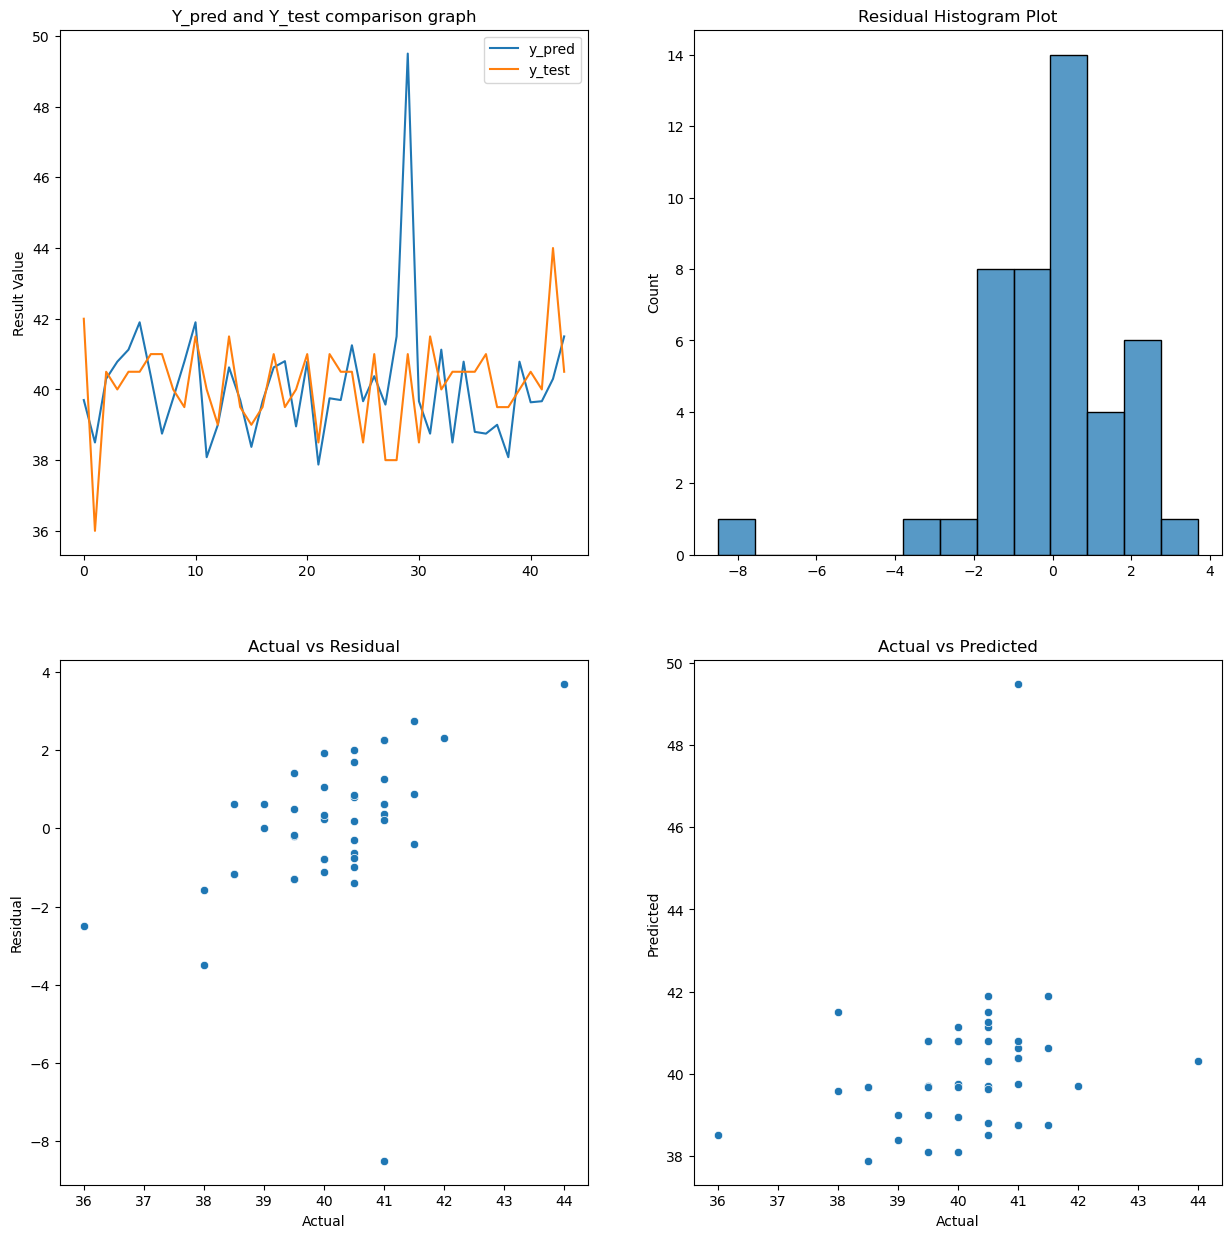

In [186]:
plot_graph(y_test,y_pred)

In [165]:
rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [166]:
y_pred = rfr.predict(X_test)
y_pred

array([42.975     , 37.8       , 40.        , 40.15      , 39.25      ,
       41.95      , 39.35      , 39.7       , 43.75      , 40.1       ,
       40.75      , 39.05      , 39.12864036, 39.4       , 39.25      ,
       38.65      , 39.2       , 41.8       , 40.2       , 39.7       ,
       41.        , 39.5       , 43.75      , 39.9       , 40.9       ,
       39.05      , 40.1       , 39.75      , 38.9       , 40.5       ,
       39.75      , 38.5       , 39.25      , 39.55      , 40.85      ,
       39.15      , 39.5       , 39.95      , 38.5       , 40.9       ,
       39.8       , 39.15      , 40.5       , 41.1       ])

In [115]:
get_model_evaluation(rfr, y_test, y_pred)

Mean Squared Error = 2.003
Mean Absolute Error = 1.022
Root Mean Squared Error = 1.415
R2_Score Value = -0.247


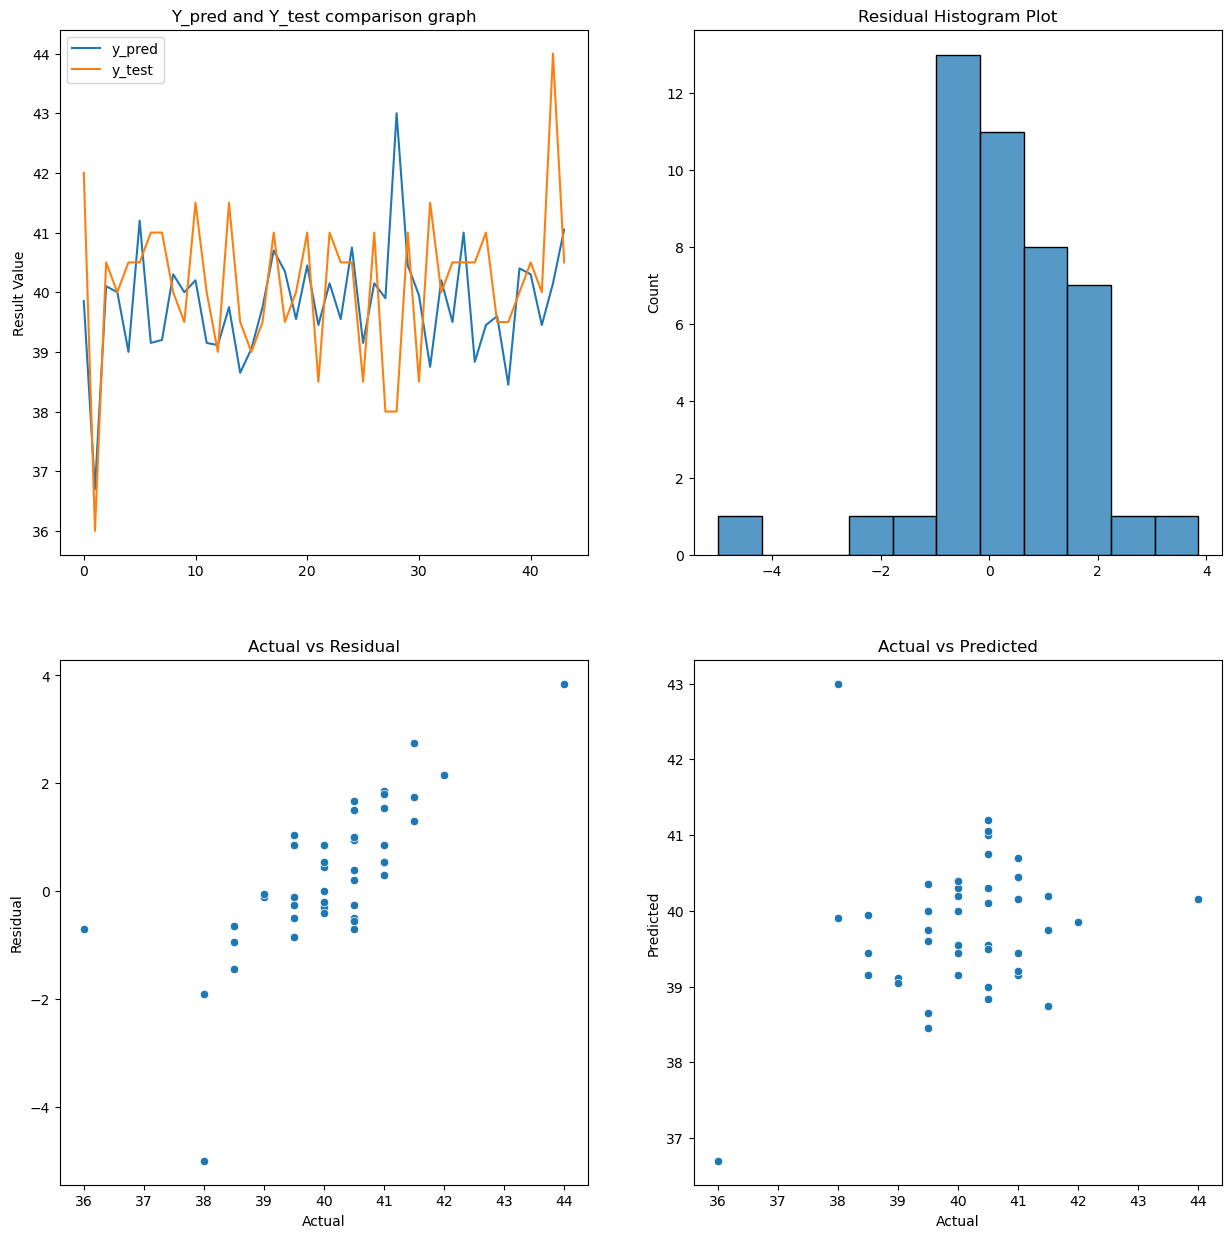

In [116]:
plot_graph(y_test, y_pred)

In [117]:
param_grid = {'max_depth':[None, 10, 20, 30],'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'max_features' : ['auto' , 'sqrt' , 'log2']}

In [118]:
grid_search = GridSearchCV(rfr, param_grid, cv = 3, scoring = 'neg_mean_absolute_error')

In [119]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [120]:
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)

In [121]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [122]:
get_model_evaluation(best_regressor, y_test, y_pred)

Mean Squared Error = 1.278
Mean Absolute Error = 0.924
Root Mean Squared Error = 1.13
R2_Score Value = 0.204


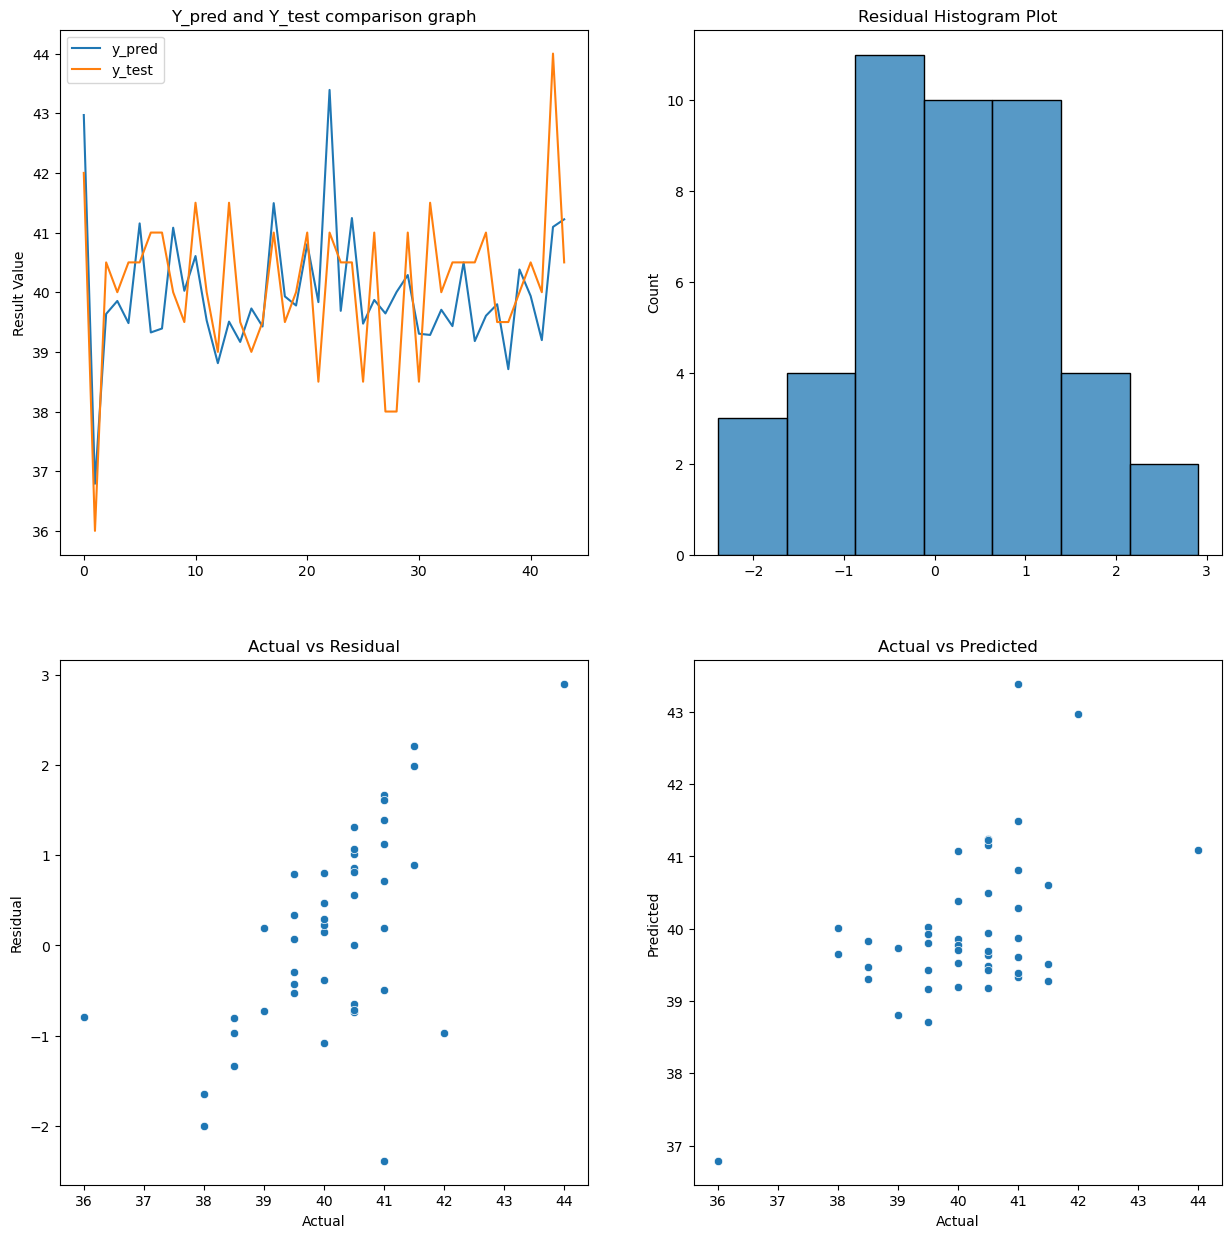

In [123]:
plot_graph(y_test, y_pred)

MAnual class Random Forest

In [124]:
class random_forest:
    def __init__(self, n_estimators = 10):
        #self.df = df
        self.n_estimators = n_estimators
        self.model_list = []
    
    def get_bootstap_df_samples(self, df):
        bootstrap_samples = []
        for i in range(self.n_estimators):
            bootstrap_sample = df.sample(len(df), replace = True)
            bootstrap_samples.append(bootstrap_sample)
        return bootstrap_samples

    def fit(self, X, Y):
        #Here models should be trained
        df = pd.concat([X, Y], axis = 1)
        samples = self.get_bootstap_df_samples(df)
        for sample in samples:
            X_train = sample.drop(columns = "Result Value")
            y_train = sample["Result Value"]
            model=DecisionTreeRegressor()
            #model = LinearRegression()
            rgr =  model.fit(X_train,y_train)
            self.model_list.append(rgr)
        return self.model_list
        
    def predict(self, X_test):
        #This can leverage self.model_list to make predictions
        #It should return predictions
        prediction_list = []
        for tree in self.model_list:
            y_pred = tree.predict(X_test)
            prediction_list.append(y_pred)
        
        sum = 0
        for i in prediction_list:
            sum = sum + i
        avg = sum/len(self.model_list)
        #print(prediction_list)
        #print(sum)
        return avg

In [125]:
df = df_droped_date
N = int( len(df)*0.9)
df = df.sample(frac = 1)
df_test = df.iloc[N:]
df_train = df.iloc[0:N]
x_train, y_train = df_train.drop(['Result Value'], axis = 1),  df_train[['Result Value']]
x_test, y_test = df_test.drop(['Result Value'], axis = 1), df_test[['Result Value']]
mdl = random_forest(n_estimators=1000)
mdl.fit(x_train, y_train)

[DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTre

In [126]:
y_pred = mdl.predict(x_test)
y_pred

array([39.921     , 39.84222491, 39.10524603, 39.99543333, 38.1115    ,
       39.2788    , 39.90287237, 39.6185    , 39.02785714, 40.0895    ,
       40.48308125, 39.4408631 , 39.5527994 , 39.64817729, 38.92953   ,
       39.66413281, 40.49911111, 40.418     , 39.556     , 39.084     ,
       41.1885    , 40.8763    , 39.17175   , 39.90106875, 40.612     ,
       40.1535    , 39.9885    , 39.8921978 , 39.068     , 40.41283333,
       40.05007143, 39.1565    , 39.26475934, 38.999     , 38.074     ,
       38.623     , 39.49619231, 38.878     , 37.5735    , 38.7465    ,
       39.0715    , 39.737     , 41.076     , 40.96671429])

In [127]:
mean_absolute_error(y_test["Result Value"], y_pred)

0.6918214358774364

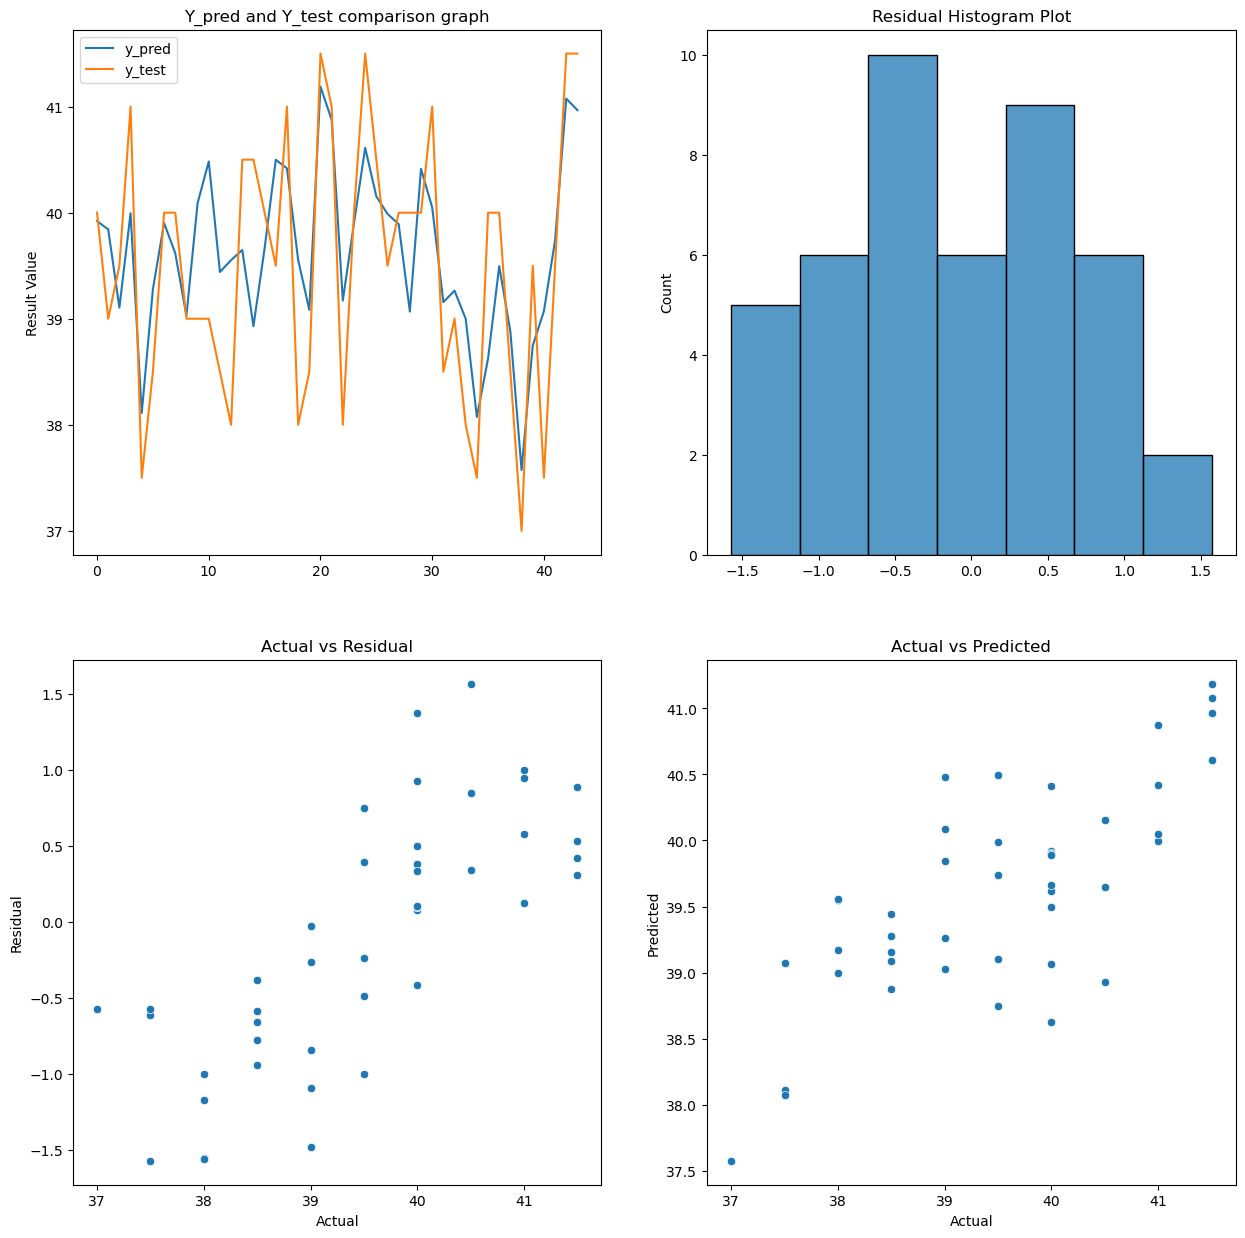

In [128]:
plot_graph(y_test['Result Value'], y_pred)

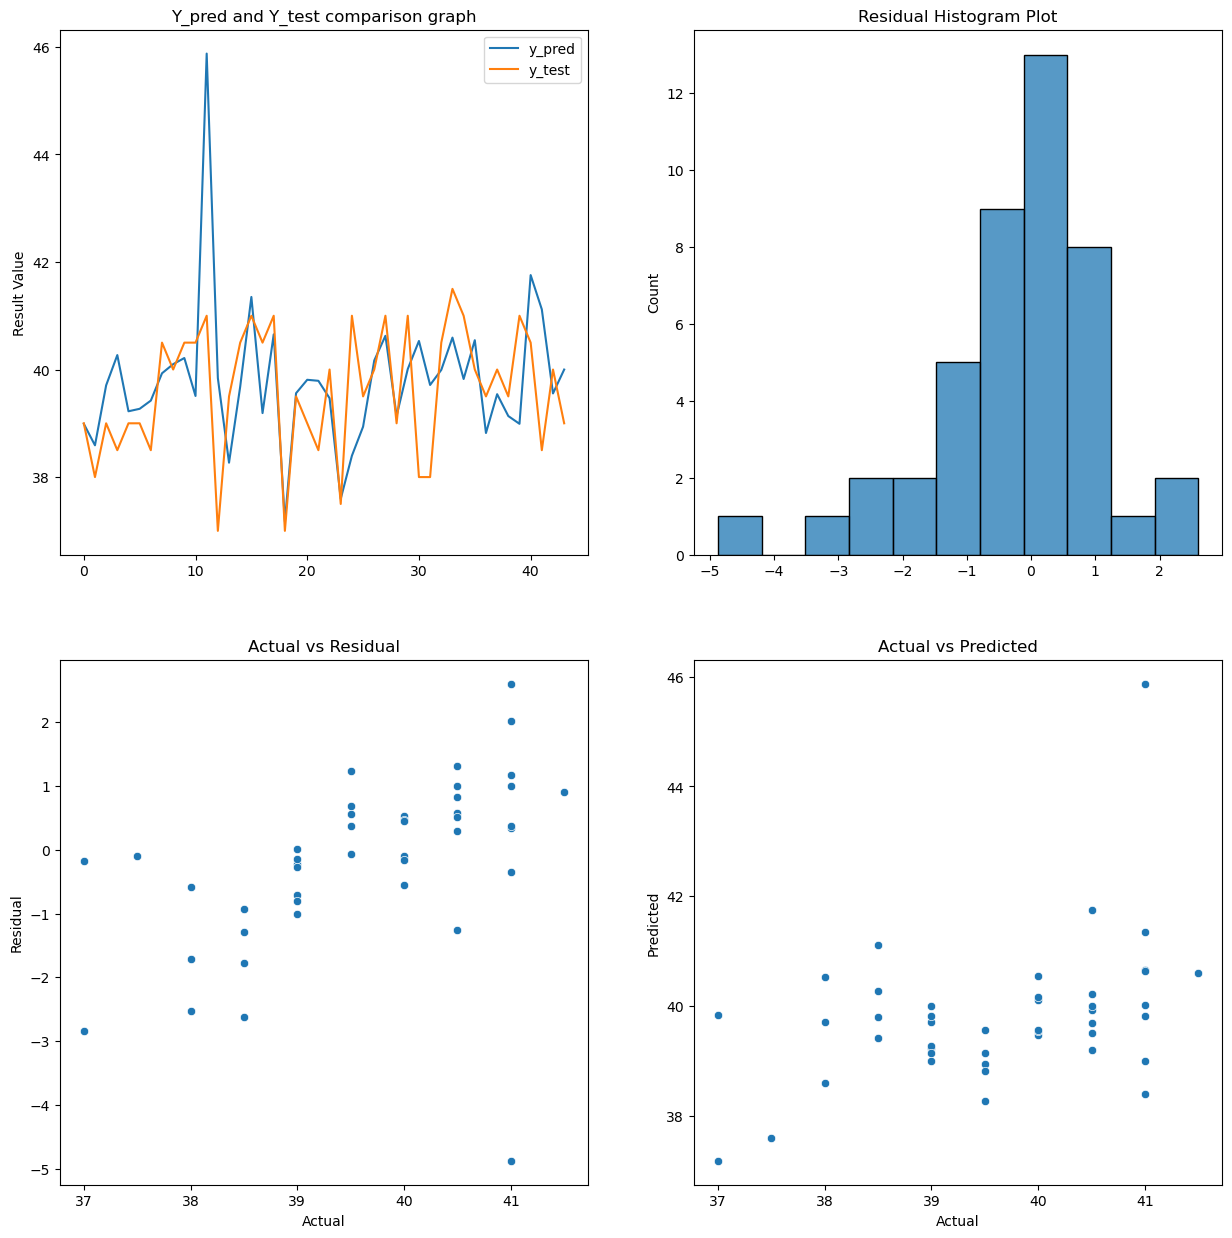

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
base_estimator = LinearRegression()
mdl = GradientBoostingRegressor(n_estimators=130)
pipe = Pipeline([('tf0', StandardScaler()), ('mdl', mdl)])
df = df_droped_date.copy()
Y = df.pop('Result Value')
#X = DF
X = df
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)
mdl.fit(x_train, y_train)
pred = mdl.predict(x_test)

plot_graph(y_test, pred)

In [130]:
imp =pipe['mdl'].feature_importances_
imp = [True if i>0.04 else False for i in imp]
imp

[False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False]

In [131]:
DF = df[df.columns[imp]]
DF

,APS Overhead Pressure,FBS D/O TEMP,11-T-1 REFLUX FLOW,ATF D/O TEMP
0,1.66,164.26,188.13,192.96
1,1.65,163.36,183.09,191.51
2,1.64,163.31,179.98,191.37
3,1.63,164.36,187.31,193.59
4,1.63,162.91,176.66,190.97
...,...,...,...,...
434,1.50,160.69,171.22,194.62
435,1.40,159.79,155.03,191.49
436,1.40,158.46,155.82,192.37
437,1.40,158.44,166.03,191.90
